<a href="https://colab.research.google.com/github/Foutse/My_NLP_Projects/blob/master/analysis_on_french_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pickle 
import numpy as np
from sklearn.externals import joblib

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
dic_file = open("/content/drive/My Drive/Colab Notebookss/movies_scrapping/final_data/data.pkl", "rb")
Dictionary = pickle.load(dic_file)
model_file = "/content/drive/My Drive/Colab Notebookss/movies_scrapping/models/s_a_modelrmsprop.sav"
model = joblib.load(model_file)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
def adjust_n(l,n=500):
    length = len(l)
    if length > n :
        return l[:n]
    return l + [0]*(n-length)


In [ ]:
phrase_to_test="Le match étais très nul, puff"
phrase = phrase_to_test.split(' ')
phrase

['Le', 'match', 'étais', 'très', 'nul,', 'puff']

In [ ]:
new_phrase = adjust_n([ Dictionary.get(i)  for i in phrase if Dictionary.get(i)],n = 500)

In [ ]:
print(Dictionary.get('puff'))

None


In [ ]:
new_phraseS = np.reshape(new_phrase, (500, 1)).T

In [ ]:
predictions = model.predict(new_phraseS) #['Negative', 'Neutre','Positive']
predictions

array([[0.9398753 , 0.05536384, 0.00476089]], dtype=float32)

We observe that it predicted with **93.98%** that the phrase is **négatif**

Now let us do the test on female tweets

In [ ]:
femaleS_tweets = "/content/drive/My Drive/Colab Notebookss/movies_scrapping/femalesports_rtRemovedFRs.csv"

In [ ]:
import pandas as pd
data = pd.read_csv(femaleS_tweets) 
data.columns

Index(['id', 'created_at', 'source', 'original_text', 'clean_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'place_coord_boundaries'],
      dtype='object')

In [ ]:
places= pd.DataFrame(data.place) 
places.head()

,place
0,Bamako
1,"Paris, Ile-de-France"
2,Toulon
3,"Lyon, France"
4,Abidjan


In [ ]:
places.isnull().sum()

place    30
dtype: int64

In [ ]:
places=places.dropna()

In [ ]:
len(places.place.unique())

72

In [ ]:
data_places = pd.DataFrame({'Country': places.place.unique() ,'count': places.place.value_counts()})
data_places.reset_index(drop=True, inplace=True)
data_places.head()

,Country,count
0,Bamako,16
1,"Paris, Ile-de-France",13
2,Toulon,7
3,"Lyon, France",6
4,Abidjan,5


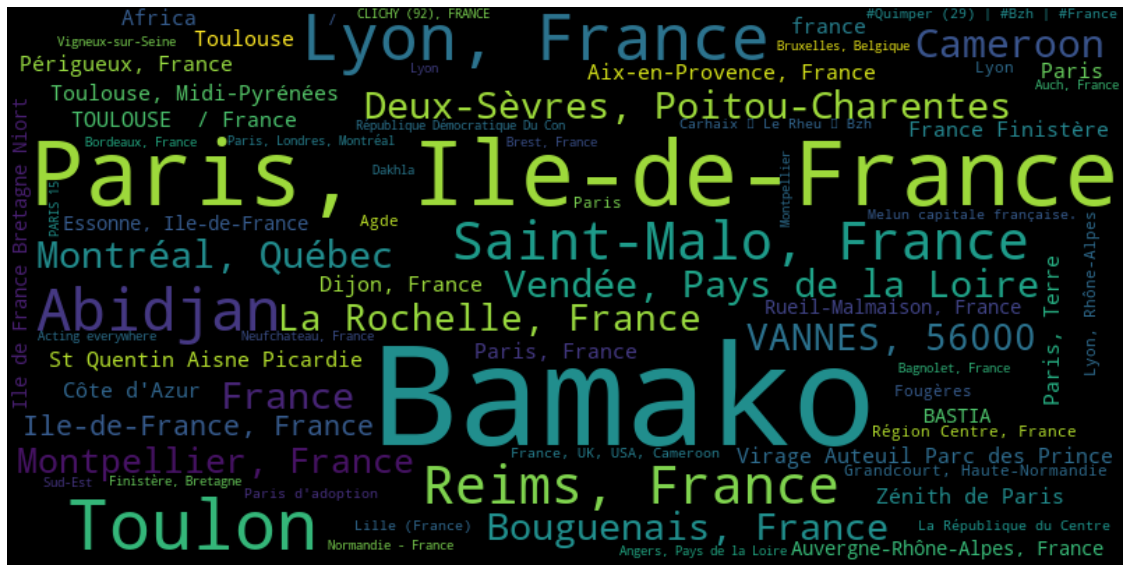

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data_places = dict(zip(data_places['Country'].tolist(), data_places['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(data_places)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_tweets = data.original_text
all_tweets[:5]

0    24 février 2020| Rencontre de  lancement du #v...
1    #Championne adulte et grande championne du con...
2    PORTRAIT \n\nUn portrait réalisé d'une jeune r...
3    💪#Entrepreneuriat au #féminin ⚡️\nEnvie de cré...
4    Rugby/Tournoi de promotion WARYTT 2020: les or...
Name: original_text, dtype: object

In [ ]:
def remove_url(txt):
    import re

    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
len(all_tweets)

160

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['24 fvrier 2020 Rencontre de lancement du vivier dexpertise fminin dans le cadre du Programme Leadership Fm',
 'Championne adulte et grande championne du concours gnral agricole Du Bon Vent Joanna Cama une vache en trois',
 'PORTRAIT Un portrait ralis dune jeune rugbywoman mojito portrait draw drawing dessin art Toulon',
 'Entrepreneuriat au fminin Envie de crer votre propre activit Du 9 au 27 mars 2020 venez en discuter',
 'RugbyTournoi de promotion WARYTT 2020 les organisateurs dressent le bilan de la premire dition']

In [ ]:
my_tweets = pd.DataFrame(all_tweets_no_urls, columns = ['tweets']) 


In [ ]:
my_tweets.head()

,tweets
0,24 fvrier 2020 Rencontre de lancement du vivie...
1,Championne adulte et grande championne du conc...
2,PORTRAIT Un portrait ralis dune jeune rugbywom...
3,Entrepreneuriat au fminin Envie de crer votre ...
4,RugbyTournoi de promotion WARYTT 2020 les orga...


In [ ]:
# We put all the words to lower case.
my_tweets['tweets'] = my_tweets['tweets'].map(lambda tweet: tweet.lower())
my_tweets['tweets'] = my_tweets['tweets'].map(lambda tweet: tweet.split())
my_tweets.head()

,tweets
0,"[24, fvrier, 2020, rencontre, de, lancement, d..."
1,"[championne, adulte, et, grande, championne, d..."
2,"[portrait, un, portrait, ralis, dune, jeune, r..."
3,"[entrepreneuriat, au, fminin, envie, de, crer,..."
4,"[rugbytournoi, de, promotion, warytt, 2020, le..."


In [ ]:
my_tweets["tweets"] = my_tweets["tweets"].map(lambda tweet :adjust_n([ Dictionary.get(i)  for i in tweet if Dictionary.get(i)],n = 500))


In [ ]:
my_tweets.head()

,tweets
0,"[1853, 1481, 6624, 1200, 1297, 0, 0, 0, 0, 0, ..."
1,"[2242, 192, 7728, 27, 3777, 9542, 241, 0, 0, 0..."
2,"[3033, 3033, 8137, 225, 3033, 353, 3758, 0, 0,..."
3,"[163, 535, 1449, 3228, 6794, 0, 0, 0, 0, 0, 0,..."
4,"[6646, 4612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
X_test = np.array(list(x for x in test_tweets))


In [ ]:
np.shape(X_test)

(160, 500)

In [ ]:
predictions = model.predict(X_test)


In [ ]:
y_pred = (predictions).argmax(axis=1)
y_pred, len(y_pred)

(array([1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1,
        2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1,
        2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0,
        1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0,
        0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
        0, 2, 2, 0, 0, 0]), 160)

In [ ]:
np.shape(predictions)

(160, 3)

In [ ]:
my_results = pd.DataFrame(y_pred, columns = [ 'Model_predictions']) 


In [ ]:
cleaned_tweets = pd.DataFrame(all_tweets_no_urls, columns = ['tweets']) 

cleaned_tweets.head()

,tweets
0,24 fvrier 2020 Rencontre de lancement du vivie...
1,Championne adulte et grande championne du conc...
2,PORTRAIT Un portrait ralis dune jeune rugbywom...
3,Entrepreneuriat au fminin Envie de crer votre ...
4,RugbyTournoi de promotion WARYTT 2020 les orga...


In [ ]:
model_results = pd.concat([cleaned_tweets, my_results], axis=1, sort=False)


In [ ]:
model_results.head()

,tweets,Model_predictions
0,24 fvrier 2020 Rencontre de lancement du vivie...,1
1,Championne adulte et grande championne du conc...,0
2,PORTRAIT Un portrait ralis dune jeune rugbywom...,2
3,Entrepreneuriat au fminin Envie de crer votre ...,0
4,RugbyTournoi de promotion WARYTT 2020 les orga...,0


Let us summarise our results in a figure:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


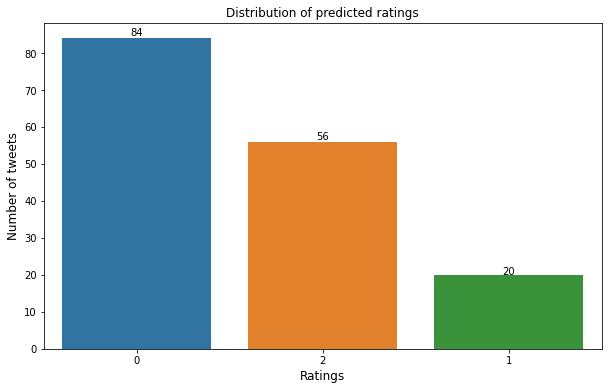

In [ ]:
import seaborn as sns

rating_count = model_results.Model_predictions.value_counts()
X = rating_count.index 
Y = rating_count.values 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(X,Y, order=X)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
plt.title('Distribution of predicted ratings', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [ ]:
model_results['tweets'][0], predictions[0]

('24 fvrier 2020 Rencontre de lancement du vivier dexpertise fminin dans le cadre du Programme Leadership Fm',
 array([0.27406648, 0.39555746, 0.33037603], dtype=float32))

In [ ]:
model_results['tweets'][1], predictions[1]

('Championne adulte et grande championne du concours gnral agricole Du Bon Vent Joanna Cama une vache en trois',
 array([0.42829975, 0.3866179 , 0.18508236], dtype=float32))

![Texte alternatif…](https://i.pinimg.com/originals/78/c5/c0/78c5c019d576f8fe1cce5d3b75a0bdb7.gif)